# Lab 21 - Boosting
# Lecture 21

lets work with spambase again

In [1]:
library('bayesreg')
data(spambase)
colnames(spambase)[50:55] <- paste0('char.freq.',c('semic','paren','bracket','exclaim','dollar','pound'))

In [2]:
library('gbm')

Warning message:
"package 'gbm' was built under R version 4.0.4"
Loaded gbm 2.1.8



In [3]:
?gbm

gbm                    package:gbm                     R Documentation

_G_e_n_e_r_a_l_i_z_e_d _B_o_o_s_t_e_d _R_e_g_r_e_s_s_i_o_n _M_o_d_e_l_i_n_g (_G_B_M)

_D_e_s_c_r_i_p_t_i_o_n:

     Fits generalized boosted regression models. For technical details,
     see the vignette: 'utils::browseVignettes("gbm")'.

_U_s_a_g_e:

     gbm(
       formula = formula(data),
       distribution = "bernoulli",
       data = list(),
       weights,
       var.monotone = NULL,
       n.trees = 100,
       interaction.depth = 1,
       n.minobsinnode = 10,
       shrinkage = 0.1,
       bag.fraction = 0.5,
       train.fraction = 1,
       cv.folds = 0,
       keep.data = TRUE,
       verbose = FALSE,
       class.stratify.cv = NULL,
       n.cores = NULL
     )
     
_A_r_g_u_m_e_n_t_s:

 formula: A symbolic description of the model to be fit. The formula
          may include an offset term (e.g. y~offset(n)+x). If
          'keep.data = FALSE' in the initial call to 'gbm' then it is
          the user's responsibility to resupply the offset to
          'gbm.more'.

distribution: Either a character string specifying the name of the
          distribution to use or a list with a component 'name'
          specifying the distribution and any additional parameters
          needed. If not specified, 'gbm' will try to guess: if the
          response has only 2 unique values, bernoulli is assumed;
          otherwise, if the response is a factor, multinomial is
          assumed; otherwise, if the response has class '"Surv"', coxph
          is assumed; otherwise, gaussian is assumed.

          Currently available options are '"gaussian"' (squared error),
          '"laplace"' (absolute loss), '"tdist"' (t-distribution loss),
          '"bernoulli"' (logistic regression for 0-1 outcomes),
          '"huberized"' (huberized hinge loss for 0-1 outcomes),
          classes), '"adaboost"' (the AdaBoost exponential loss for 0-1
          outcomes), '"poisson"' (count outcomes), '"coxph"' (right
          censored observations), '"quantile"', or '"pairwise"'
          (ranking measure using the LambdaMart algorithm).

          If quantile regression is specified, 'distribution' must be a
          list of the form 'list(name = "quantile", alpha = 0.25)'
          where 'alpha' is the quantile to estimate. The current
          version's quantile regression method does not handle
          non-constant weights and will stop.

          If '"tdist"' is specified, the default degrees of freedom is
          4 and this can be controlled by specifying 'distribution =
          list(name = "tdist", df = DF)' where 'DF' is your chosen
          degrees of freedom.

          If "pairwise" regression is specified, 'distribution' must be
          a list of the form
          'list(name="pairwise",group=...,metric=...,max.rank=...)'
          ('metric' and 'max.rank' are optional, see below). 'group' is
          a character vector with the column names of 'data' that
          jointly indicate the group an instance belongs to (typically
          a query in Information Retrieval applications). For training,
          only pairs of instances from the same group and with
          different target labels can be considered. 'metric' is the IR
          measure to use, one of

          list("conc") Fraction of concordant pairs; for binary labels,
              this is equivalent to the Area under the ROC Curve

          : Fraction of concordant pairs; for binary labels, this is
              equivalent to the Area under the ROC Curve

          list("mrr") Mean reciprocal rank of the highest-ranked
              positive instance

          : Mean reciprocal rank of the highest-ranked positive
              instance

          list("map") Mean average precision, a generalization of 'mrr'
              to multiple positive instances

          : Mean average precision, a generalization of 'mrr'

In [4]:
dim(spambase)

[1] 4601   58

In [5]:
train_ss = sample(1:nrow(spambase),floor(nrow(spambase)/2))

In [6]:
head(train_ss)

[1] 1138 2748 3203 3524 1416 2714

In [7]:
train = spambase[train_ss,]
validate = spambase[-train_ss,]

In [8]:
dim(train)
dim(validate)

[1] 2300   58

[1] 2301   58

In [9]:
mod = gbm(is.spam~.,data=train,distribution="bernoulli",n.trees=100,
          shrinkage=0.1,interaction.depth=1,verbose=TRUE)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2694             nan     0.1000    0.0308
     2        1.2110             nan     0.1000    0.0284
     3        1.1640             nan     0.1000    0.0231
     4        1.1214             nan     0.1000    0.0211
     5        1.0854             nan     0.1000    0.0159
     6        1.0509             nan     0.1000    0.0172
     7        1.0187             nan     0.1000    0.0156
     8        0.9885             nan     0.1000    0.0135
     9        0.9634             nan     0.1000    0.0118
    10        0.9381             nan     0.1000    0.0116
    20        0.7589             nan     0.1000    0.0066
    40        0.5759             nan     0.1000    0.0036
    60        0.4825             nan     0.1000    0.0016
    80        0.4270             nan     0.1000    0.0006
   100        0.3873             nan     0.1000    0.0001



,var,rel.inf
,<chr>,<dbl>
char.freq.exclaim,char.freq.exclaim,24.57910123
char.freq.dollar,char.freq.dollar,19.65930094
word.freq.remove,word.freq.remove,11.21820939
word.freq.free,word.freq.free,8.17115692
capital.run.length.average,capital.run.length.average,8.00738204
word.freq.hp,word.freq.hp,7.12628759
word.freq.your,word.freq.your,6.91166911
word.freq.money,word.freq.money,3.36581013
capital.run.length.longest,capital.run.length.longest,2.52208468


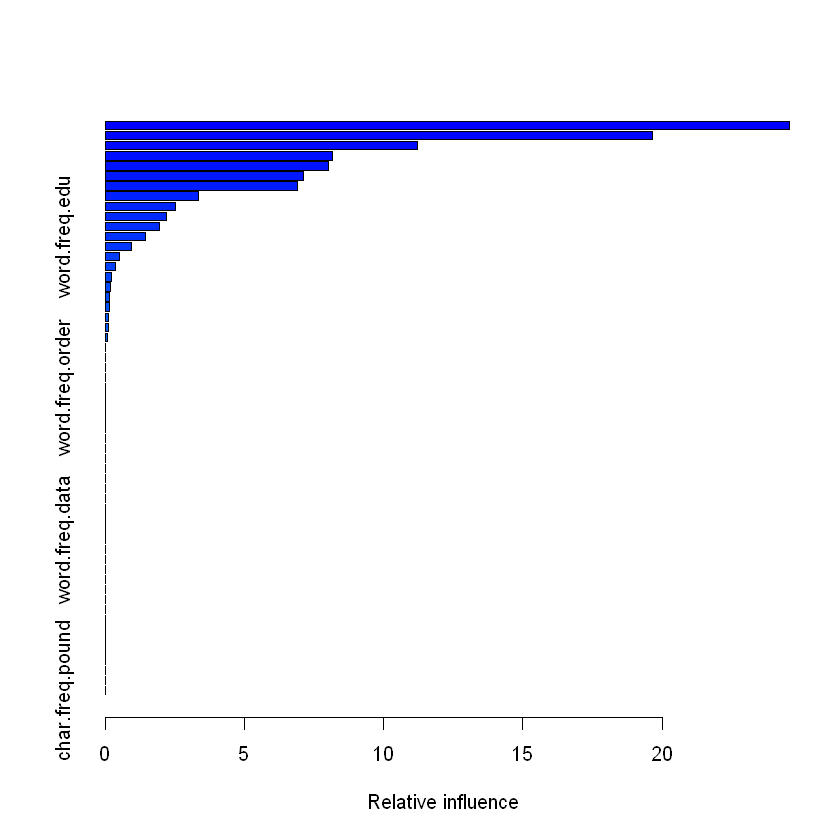

In [10]:
summary(mod)

In [13]:
class(head(spambase$is.spam))

[1] "integer"

In [16]:
preds = (predict(mod,n.tree=100,type="response")>.5)*1

In [17]:
table(preds,train$is.spam)

     
preds    0    1
    0 1381  100
    1   35  784

In [19]:
nseq = 1:100
pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
head(pred_mtx)
dim(pred_mtx)

1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 2300  100

In [20]:
err = sapply(nseq,function(i)mean(pred_mtx[,i]!=train$is.spam))

In [21]:
head(err)

[1] 0.3843478 0.3843478 0.2169565 0.2169565 0.2169565 0.2000000

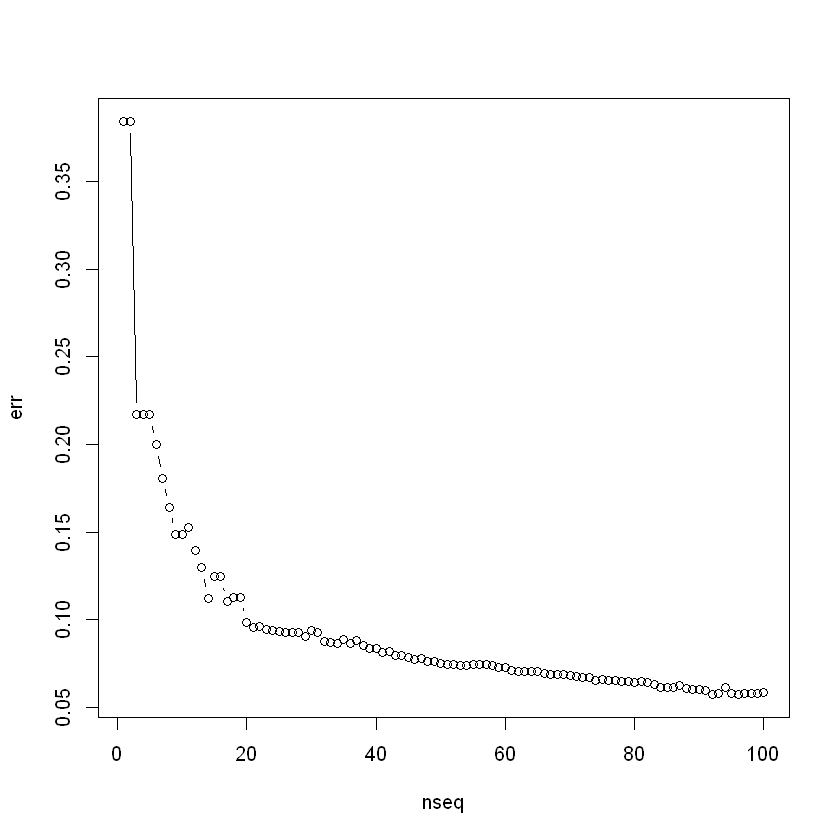

In [23]:
plot(nseq,err,type='b')

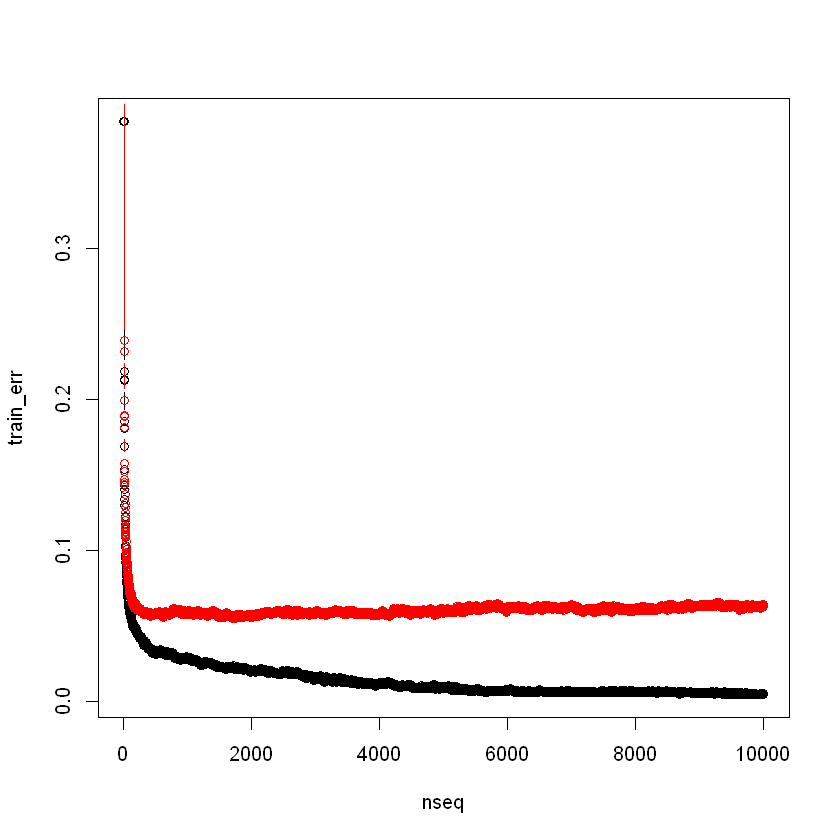

In [30]:
nseq = 1:10000
mod = gbm(is.spam~.,data=train,distribution="bernoulli",n.trees=max(nseq),
          shrinkage=0.1,interaction.depth=1)
train_pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
train_err = sapply(nseq,function(i)mean(train_pred_mtx[,i]!=train$is.spam))
test_pred_mtx = (predict(mod,validate,n.tree=nseq,type="response")>.5)*1
test_err = sapply(nseq,function(i)mean(test_pred_mtx[,i]!=validate$is.spam))

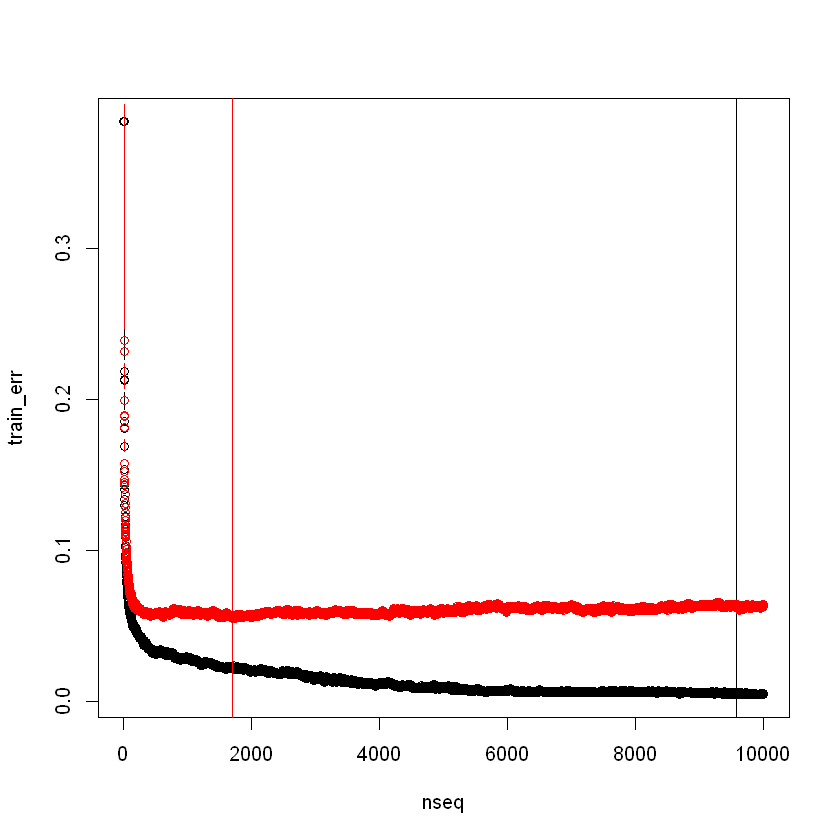

In [32]:
plot(nseq,train_err,type='b')           
abline(v=which.min(train_err))
points(nseq,test_err,type='b',col='red')
abline(v=which.min(test_err),col='red')

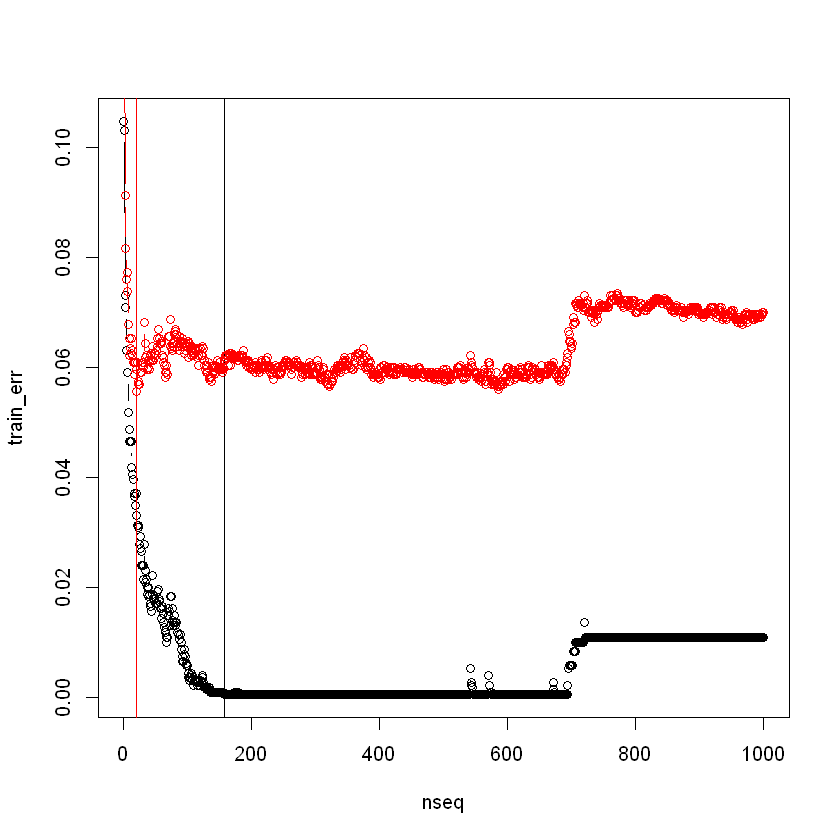

In [39]:
nseq = 1:1000
mod = gbm(is.spam~.,data=train,distribution="bernoulli",n.trees=max(nseq),
          shrinkage=.5,interaction.depth=5)
train_pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
train_err = sapply(nseq,function(i)mean(train_pred_mtx[,i]!=train$is.spam))
test_pred_mtx = (predict(mod,validate,n.tree=nseq,type="response")>.5)*1
test_err = sapply(nseq,function(i)mean(test_pred_mtx[,i]!=validate$is.spam))
plot(nseq,train_err,type='b')           
abline(v=which.min(train_err))
points(nseq,test_err,type='b',col='red')
abline(v=which.min(test_err),col='red')